In [ ]:
import numpy as np
from math import sin,pi
import matplotlib.pyplot as plt
import random

In [ ]:
def f(x1, x2):
  y = np.sin(x1+x2)
  return y

`part c.2`: *Generate Dataset*

In [ ]:
x1_vals = [] #input 1
x2_vals = [] #input 2
y_vals = [] #target
num_data = 10000

for i in range(0, num_data):
    randd1 = random.uniform(0, 2*pi)
    randd2 = random.uniform(0, 2*pi)
    x1_vals.append(randd1)
    x2_vals.append(randd2)
    y_vals.append(f(x1_vals[i],x2_vals[i]))

x_vals = []
for i in range(len(x1_vals)):
  x_vals.append((x1_vals[i], x2_vals[i]))

x_vals = np.array(x_vals)
x_vals = np.reshape(x_vals, (num_data, 2, 1))
y_vals = np.array(y_vals)
y_vals = np.reshape(y_vals, (num_data, 1))

In [ ]:
#Splitting dataset into train, test, validation
def trainTestSplit(x_values, y_values):
    rowNum = x_values.shape[0]
    trainIndex = int(80 / 100 * rowNum) #we use 80% of datas for training
    validationIndex = int(90 / 100 * rowNum) #we use 10% of datas for validation

    x_train = x_values[:trainIndex, :] 
    y_train = y_values[:trainIndex] 

    x_validation = x_values[trainIndex:validationIndex, :] 
    y_validation = y_values[trainIndex:validationIndex] 

    x_test = x_values[validationIndex:, :] 
    y_test = y_values[validationIndex:] 

    return x_train, y_train, x_validation, y_validation, x_test, y_test

x_train, y_train, x_validation, y_validation, x_test, y_test = trainTestSplit(x_vals, y_vals)

`part c.3`: *Normalize input data*

In [ ]:
def normalizeData(data, min_data, max_data):
   return (data - min_data) / (max_data - min_data)

In [ ]:
min_data = np.min(x_train)
max_data = np.max(x_train)

x_validation = normalizeData(x_validation, min_data, max_data)
x_test = normalizeData(x_test, min_data, max_data)
x_train = normalizeData(x_train, min_data, max_data)

`part c.4`: *Model Implementation* 

In [ ]:
class NeuralNetwork:
  def __init__(self, lr, numOfHLNeurons):

    self.lr = lr
    self.numOfHLNeurons = numOfHLNeurons

    self.output = np.zeros(1) 
    self.w1 = np.random.rand(2, self.numOfHLNeurons)
    self.w2 = np.random.rand(self.numOfHLNeurons,1)

    self.b1 = np.zeros((self.numOfHLNeurons, 1))
    self.b2 = np.zeros((1, 1))

  def feedForward(self):
    self.slayer = np.dot(self.w1.T, self.input) + self.b1
    self.zlayer = self.relu(self.slayer)
    self.output = np.dot(self.w2.T, self.zlayer) + self.b2
  
  def backProp(self, y):
    #derivatives:
    
    #output layer
    d_yhat = 2 * (self.output - y)
    d_b2 = d_yhat
    d_w2 = np.dot(self.zlayer, d_yhat)
    #hidden layer
    # d_b1 = np.multiply(np.dot(self.w2, d_yhat), self.d_relu(self.slayer))
    d_b1 = np.dot(np.dot(np.dot(self.w2, self.d_relu(self.slayer).T), np.array([[1] for _ in range(self.numOfHLNeurons)])), d_yhat)

    # d_w1 = np.dot(np.dot(self.w2, d_yhat), np.dot(self.d_relu(self.slayer), self.input))
    d_w1 = np.repeat(self.input, self.numOfHLNeurons, axis=1).dot(np.multiply(d_yhat * self.d_relu(self.slayer), self.w2)) * d_yhat
    

    self.w1 -= self.lr * d_w1
    self.w2 -= self.lr * d_w2

    self.b1 -= self.lr * d_b1
    self.b2 -= self.lr * d_b2

  #calculate cost
  def calCost(self, y, yhat):
    cost = np.power(y - yhat, 2)
    return cost

  #relu
  def relu(self, x):
    return np.maximum(0, x)

  #derivative of relu
  def d_relu(self, x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

  def train(self, x, y, x_valid, y_valid, epochs):
    train_calc_cost = {}
    validation_calc_cost = {}

    for i in range(epochs):
      epoch_train_loss = 0
      epoch_validation_loss = 0

      for j in range(len(x)):
        self.input = x[j]
        self.feedForward()
        self.backProp(y[j])
        epoch_train_loss += self.calCost(self.output, y[j])

      for j in range(len(x_valid)):
        self.input = x_valid[j]
        self.feedForward()
        epoch_validation_loss += self.calCost(self.output, y_valid[j])

      
      train_calc_cost[i] = float(epoch_train_loss / len(x))
      validation_calc_cost[i] = float(epoch_validation_loss / len(x_valid))
    
      print('Epoch for %d/%d : Train data loss = %f - Validation data loss = %f' % (i, epochs, train_calc_cost[i], validation_calc_cost[i]))
    return train_calc_cost, validation_calc_cost

  def inference (self, x):
    yhat = []
    for i in range(x.shape[0]):
      self.input = x[i]
      self.feedForward()
      yhat.append(self.output)
    return yhat


In [ ]:
def plot_cost(train_cost, valid_loss, epochNum):

    plt.plot(list(train_cost.keys()), list(train_cost.values()), 'r', label='Train Loss')
    plt.plot(list(valid_loss.keys()), list(valid_loss.values()), 'b', label='Validation Loss')

    plt.legend(loc="upper right")
    plt.title("Training loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.grid(True)

    plt.xticks(list(range(0, epochNum, int(epochNum/10))))  # Setting up the x ticks

    plt.show()

def calcL2Loss(y1, y2):
    return np.sum(np.power(y1 - y2, 2)) / y1.shape[0]

In [ ]:
epochNum = 100

nn = NeuralNetwork(0.0025, 10)

train_costs, validation_costs = nn.train(x_train, y_train, x_validation, y_validation, epochNum)


Epoch for 0/100 : Train data loss = 0.269209 - Validation data loss = 0.171136
Epoch for 1/100 : Train data loss = 0.264313 - Validation data loss = 0.244109
Epoch for 2/100 : Train data loss = 0.348926 - Validation data loss = 0.187432
Epoch for 3/100 : Train data loss = 0.222999 - Validation data loss = 0.103329
Epoch for 4/100 : Train data loss = 0.128752 - Validation data loss = 0.068113
Epoch for 5/100 : Train data loss = 0.074621 - Validation data loss = 0.047508
Epoch for 6/100 : Train data loss = 0.044661 - Validation data loss = 0.037494
Epoch for 7/100 : Train data loss = 0.034817 - Validation data loss = 0.034821
Epoch for 8/100 : Train data loss = 0.032659 - Validation data loss = 0.034113
Epoch for 9/100 : Train data loss = 0.031846 - Validation data loss = 0.033676
Epoch for 10/100 : Train data loss = 0.031359 - Validation data loss = 0.033351
Epoch for 11/100 : Train data loss = 0.031047 - Validation data loss = 0.033111
Epoch for 12/100 : Train data loss = 0.030839 - Va

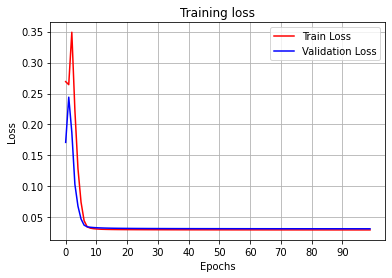


L2 loss of test data: 0.034036


In [ ]:
plot_cost(train_costs,  validation_costs, epochNum)

yhat = nn.inference(x_test)
yhat = np.array(yhat).reshape((len(yhat), 1))
print('\nL2 loss of test data: %f' % calcL2Loss(yhat, y_test))

`part c.5`: *Model Evaluation* 

In [ ]:
x1_vals = [] #input 1
x2_vals = [] #input 2
y_vals = [] #target
num_data = 10000

for i in range(0, num_data):
    randd1 = random.uniform(0, 2*pi)
    randd2 = 0
    x1_vals.append(randd1)
    x2_vals.append(randd2)
    y_vals.append(f(x1_vals[i],x2_vals[i]))

x_vals = []
for i in range(len(x1_vals)):
  x_vals.append((x1_vals[i], x2_vals[i]))

x_vals = np.array(x_vals)
x_vals = np.reshape(x_vals, (num_data, 2, 1))
y_vals = np.array(y_vals)
y_vals = np.reshape(y_vals, (num_data, 1))

x_train, y_train, x_validation, y_validation, x_test, y_test = trainTestSplit(x_vals, y_vals)

min_data = np.min(x_train)
max_data = np.max(x_train)

x_validation = normalizeData(x_validation, min_data, max_data)
x_test = normalizeData(x_test, min_data, max_data)
x_train = normalizeData(x_train, min_data, max_data)

In [ ]:
epochNum = 100

nn = NeuralNetwork(0.0025, 10)

train_costs, validation_costs = nn.train(x_train, y_train, x_validation, y_validation, epochNum)

Epoch for 0/100 : Train data loss = 0.258780 - Validation data loss = 0.147031
Epoch for 1/100 : Train data loss = 0.124426 - Validation data loss = 0.090751
Epoch for 2/100 : Train data loss = 0.091542 - Validation data loss = 0.087227
Epoch for 3/100 : Train data loss = 0.082315 - Validation data loss = 0.077626
Epoch for 4/100 : Train data loss = 0.074328 - Validation data loss = 0.072639
Epoch for 5/100 : Train data loss = 0.070710 - Validation data loss = 0.071847
Epoch for 6/100 : Train data loss = 0.069796 - Validation data loss = 0.072915
Epoch for 7/100 : Train data loss = 0.069436 - Validation data loss = 0.075202
Epoch for 8/100 : Train data loss = 0.067602 - Validation data loss = 0.077263
Epoch for 9/100 : Train data loss = 0.064683 - Validation data loss = 0.077291
Epoch for 10/100 : Train data loss = 0.061240 - Validation data loss = 0.066569
Epoch for 11/100 : Train data loss = 0.056893 - Validation data loss = 0.061472
Epoch for 12/100 : Train data loss = 0.052379 - Va

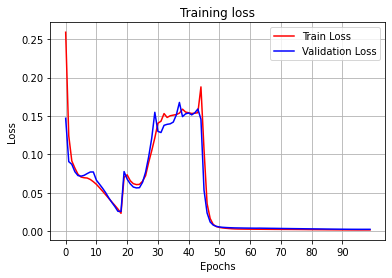


L2 loss of test data: 0.002755


In [ ]:
plot_cost(train_costs, validation_costs, epochNum)

yhat = nn.inference(x_test)
yhat = np.array(yhat).reshape((len(yhat), 1))
print('\nL2 loss of test data: %f' % calcL2Loss(yhat, y_test))

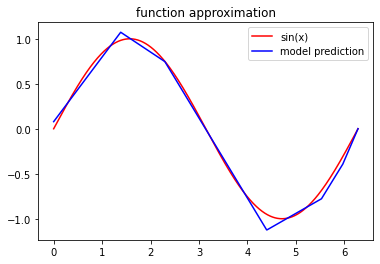

In [ ]:
x = np.linspace(0, 2*(np.pi), 1000).reshape((1000, 1))
x_net = np.append(x, np.zeros((len(x), 1)), axis = 1).reshape(1000, 2, 1)
x_net_norm = normalizeData(x_net, min_data, max_data)

yhat = nn.inference(x_net_norm)

yhat = np.array(yhat).reshape((1000, 1))
ysin = np.sin(x)


plt.plot(x, ysin, 'r', label='sin(x)')
plt.plot(x, yhat, 'b', label='model prediction')

plt.legend(loc="upper right")
plt.title("function approximation")

plt.show()

In [ ]:
_